# Transient cooling of spherically symmetric pyroclasts

- Code authors: Naylor and Clarke
- Date: March 2017

**Purpose:** To numerically model the temperature evolution across a spherically symmetric volcanic bomb.

**Method:** The cooling of the bomb was modelled assuming a spherically symmetric projectile with radiative and convective cooling at the outer boundary. The time dependent heat flow equation was discretised as a matrix in spherical coordinates following Buttsworth (1997) and the temporal component was solved using the method of lines (Schiesser, 1991) so that the Python ODE solver could be used to handle the time-stepping. This enables the numerical solver to manage numerical stability and efficiency.

**REFERENCES:**
- Buttsworth, D. R. (1997) OUEL Report Number 2130/97, A finite difference routine for the solution of transient one dimensional heat conduction problems with curvature and temperature dependent thermal properties
- Schiesser, W. E. (1991), The Numerical Method of Lines: Integration of Partial Differential Equations, Academic Press, San Diego

## 1. Load libraries

In [2]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from math import log10, floor

T_absolute = 273.17

pi = np.pi

def round_sig(x, sig=3):
    '''Function to format values for plotting'''
    return round(x, sig-int(floor(log10(abs(x))))-1)

## 2. Define function to return the discretised spatial derivative of temperature and apply boundary conditions

In [3]:
def odefunc(u, t):
    dudt = np.zeros(X.shape)
    
    # Apply Boundary Conditions
    dudt[0] = 6*kappa/dr**2 *(u[1]-u[0])              # Internal BC
    dudt[-1] += 2.* h_c*kappa/k * (T_0 - u[-1])/dr    # Conductive BC
    dudt[-1] += 2.* gamma*kappa/k * ((T_0+T_absolute)**4 - (u[-1]+T_absolute)**4)/dr     # Radiative BC

    # Define internal derivatives after Butterworth (See references)
    for i in range(1, N-1):
        dudt[i] = kappa * ((i+1)*u[i + 1] - 2*i*u[i] + (i-1)*u[i - 1]) / (i*dr**2)

    return dudt

## Example 1: Basic calculation

### Specify model parameters

In [18]:
# Specify bomb size and generate the spatially discretised nodes 
R = 0.05/2               # Radius of sample [m]
N = 101                  # number of points to discretize
X = np.linspace(0, R, N) # Node positions along radius
dr = R / (N - 1)         # Spatial step size [m]

# Initial conditions
initialTemperature = 750.   # Initial temperature [degC]
init = initialTemperature * np.ones(X.shape) # Initial temperature at nodes

# Define array of output times
startTime = 0.   # Start time [s]
finalTime = 20. # Model end time [s]
tspan = np.linspace(startTime, finalTime, int(finalTime - startTime)/2) # [start time, end time, number of times to investigate in range]        

# Set Thermal Parameters
kappa = 3.0e-7 # Thermal diffusivity [m^2/s]
h_c = 435.     # Heat transfer coefficient []
k = 1.5        # Thermal conductivity []
T_0 = 0.       # Ambient Temperature [degC]
gamma = 5.669e-8 # Emmisivity [W/m^2/K^4]

C:\Users\ogdoa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


### Solve the transient heat flow problem

In [19]:
sol = odeint(odefunc, init, tspan)

### Plot the results

Text(0.5, 1.0, 'Radius = 0.025 m')

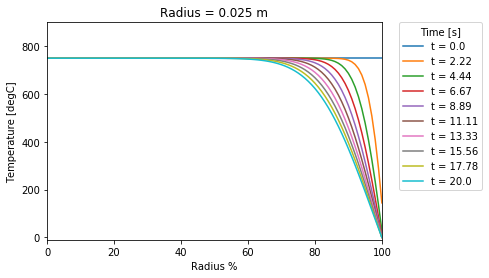

In [22]:
Xp = (X/R)*100 # convert length to percentage of radius

i = 0
for time in tspan:
    plt.plot(Xp,sol[i,:], label=("t = " + str(np.round(time,2)))) # define time step to plot and legend box
    i = i+1
    
plt.ylim(-10,900)
plt.xlim(0,100)
plt.xlabel("Radius %")
plt.ylabel("Temperature [degC]")
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Time [s]")
plt.title("Radius = " + str(R) + " m")  

## 4. EXAMPLE 2: Experiment to compare the temperature profiles of bombs with different diameter and porosity 

### Set model parameters

In [23]:
runTime = 10. # end time (s), this will also be the time profile plotted at the end
N = 101       # number of points to discretize

### Set porosities and diameters to compare

In [24]:
Por1 = 0    #set lower porosity
Por2 = 0.75 #set higher porosity

FQA = 0.004 #average diameter of FQA (m)
DQA = 0.016 #average diameter of DQA (m)

### Set physical parameters

In [26]:
v = 30.         # average velocity [m^s-1]
T_0 = 25.       # Ambient Temperature [degC]
AD = 1.027      # air density [kg^m-3]
au = 0.00001851 # air viscoisty [Pa.s]
Ka = 0.024      # thermal conductivity of air [W^m^K]
Km = 1.224      # thermal conductivity pantellerite glass [W/m/K]
md = 2470000    # density of melt [g^m-3]
cpm = 1.42      # Heat capacity pantellerite melt [J^K^g]
vd = 205.       # density of gas in vesicles [g^m-3]
cps = 2.343     # heat capacity of gas in vesicles ie.steam [J^K^g]
gamma = 5.669e-8 # Black body emissivity [W/m^2/K^4]
tg = 400.       # glass transition temperature [degC]

### Calculate initial volumes of achneliths assuming intial porosity = 0  

In [27]:
VFQA = (4/3)*pi*(FQA/2)**3 # volume of FQA including vesicles 
VDQA = (4/3)*pi*(DQA/2)**3 # volume of DQA including vesicles

NVFQA = (1-Por2)*VFQA
rcubedFQA = NVFQA/((4/3)*pi)
rFQA = rcubedFQA**(1/3)
NVdFQA = round_sig((2*rFQA), sig=2)# non vesicular diameter of FQA and round to 2 sig fig

NVDQA = (1-Por2)*VDQA
rcubedDQA = NVDQA/((4/3)*pi)
rDQA = rcubedDQA**(1/3)
NVdDQA = round_sig((2*rDQA), sig=2) # non vesicular diameter of DQA and round to 2 sig fig

### Loop over each of the experimental conditions, solve for the temperature profile and plot the results

Text(0.5, 1.0, 'Time = 10.0 s')

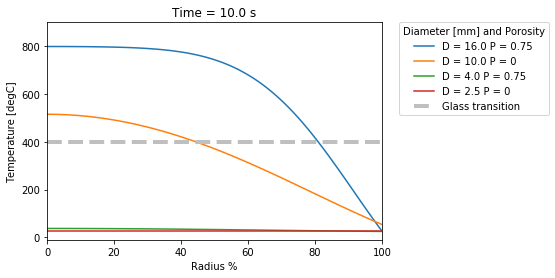

In [30]:
por_L = [[Por2,DQA],[Por1,NVdDQA],[Por2,FQA],[Por1,NVdFQA]]

fig = plt.figure() # plot graphs based on this, with future variables subordinate
    
for por,L in por_L:
        
    R = L/2       # Radius of sample [d/2]
        
    #------------- calculate flow and thermal parameters

    Re = (v*(R*2)*AD) / au                     # Reynolds number
    Nu = 2 + (0.25+((3/10000)*Re)**1.6)**(1/2) # Nusselt number
    h_c = (Nu*Ka)/(R*2)                        # Heat transfer coefficient
    fd = (vd*por) + (md*(1-por))               # bulk density of foam [g^m-3]
    k = Km*(1-por)/(1+por)                     # Conductivity of foam taking porosity into account [W^m^K]
    cpf = ((por*cps*vd) + ((1-por)*cpm*md))/fd # Heat capacity of foam [J^K^g]
    kappa = k/(fd*cpf)                         # Thermal diffusivity taking porosity into account [m^2/s]

    #------------- set calculation parameters

    X = np.linspace(0, R, N) # position along radius
    dr = R / (N - 1)         # Spatial step size

    #------------- the bit that does the work

    init = 800.0 * np.ones(X.shape)     # initial temperature
    tspan = np.linspace(0.,runTime,100) # [start time, end time, number of times to investigate in range]
        
    sol = odeint(odefunc, init, tspan) # solve equations     
    
    #------------- plot results       
    Xp = (X/R)*100 # convert length to percentage of radius
    plt.plot(Xp,sol[-1,:], label=("D = " + str((R*2)*1000) + " P = " + str(por))) # define time step to plot and legend box

plt.axhline(tg, ls='dashed', c='0.75', linewidth=4, label="Glass transition" )
plt.ylim(-10,900)
plt.xlim(0,100)
plt.xlabel("Radius %")
plt.ylabel("Temperature [degC]")
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Diameter [mm] and Porosity")
plt.title("Time = " + str(runTime) + " s")